In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [3]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [5]:
df=pd.read_excel('raw_data.xlsx')

In [9]:
df.head(5)

,Date,US10YR,SPX,JPY,GOLD,GBP,AUD,CAD,OIL,MXWO,GABI,GABIHY,VIX
0,2009-01-30,2.8403,822.50,89.92,927.85,1.2813,0.6375,1.2296,45.88,838.83,351.900,1413.102,44.84
1,2009-02-06,2.9917,867.75,91.90,911.50,1.2940,0.6753,1.2193,46.21,870.74,350.346,1386.344,43.37
2,2009-02-13,2.8894,820.00,91.93,941.70,1.2862,0.6568,1.2354,44.81,837.02,348.868,1407.818,42.93
3,2009-02-20,2.7879,769.50,93.35,992.90,1.2826,0.6454,1.2520,41.89,772.84,364.816,1453.929,49.30
4,2009-02-27,3.0131,734.25,97.58,942.32,1.2669,0.6390,1.2763,46.35,750.86,363.345,1494.040,46.35


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [12]:
y=df['SPX']
X=df.iloc[:,df.columns!='SPX']

In [14]:
X_train=X.iloc[:510,:]
y_train=y[:510]

X_test=X.iloc[510:,:]
y_test=y[510:]

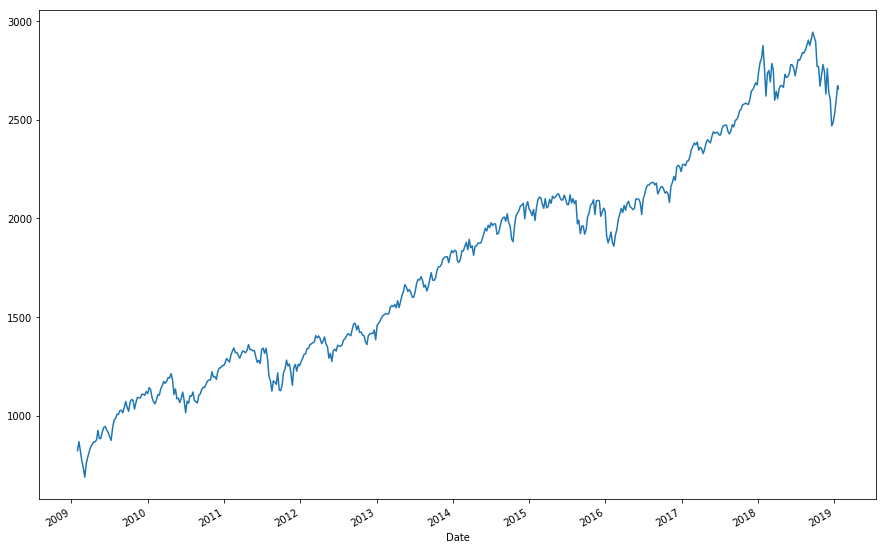

In [23]:
y.plot(figsize=(15,10))

In [54]:
X_test=X_test.dropna()

In [55]:
X_train.loc[:,'US10YR']=pd.to_numeric(X_train.loc[:,'US10YR'])
X_test.loc[:,'US10YR']=pd.to_numeric(X_test.loc[:,'US10YR'])

/home/ayan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/ayan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [56]:
predictions = gbm.predict(X_test)

In [59]:
predictions

array([2770.9016, 2608.9045, 2581.1304, 2627.2375, 2508.3381, 2493.6362,
       2394.2485, 2423.5312, 2458.8552, 2515.2173, 2582.1345, 2579.2908],
      dtype=float32)

In [62]:
y_test=y_test.dropna()

In [63]:
np.sqrt(mean_squared_error(y_test,predictions))

91.42230224702416

In [65]:
print(np.sqrt(mean_squared_error(y_train,predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [510, 12]

Text(0, 0.5, 'SPX index')

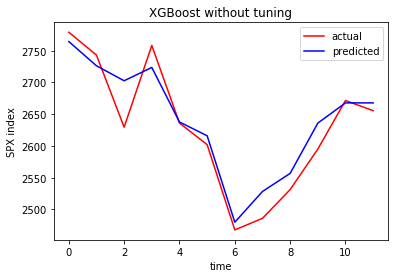

In [45]:
plt.figure(1)
plt.title(label='XGBoost without tuning')
plt.plot(list(y_test),'r',label='actual')
plt.legend('actual')
plt.plot(predicted,'b',label='predicted')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('SPX index')

In [80]:
pred=pd.Series(predictions, index=y_test.index)

Text(0,0.5,'SPX index')

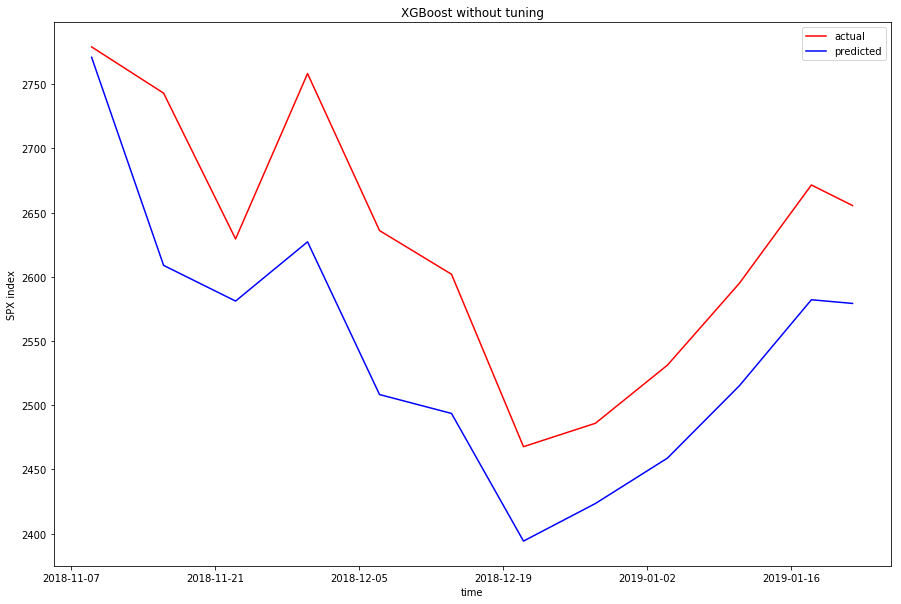

In [89]:
plt.figure(figsize=(15,10))
plt.title('XGBoost without tuning')
plt.plot(y_test,'r',label='actual')
plt.legend('actual')
plt.plot(pred,'b',label='predicted')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('SPX index')

# может спрогнозировать остальные данные и подставить оценки в нашу модель???

**Теперь попробуем сдвинуть данные**

1) GridSearch to Tune Parameters
2) what about Lasso?

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [32]:
dt=pd.read_excel('raw_data_shifted_data.xlsx',sheet_name='raw_data_changed')

In [33]:
dt.head(5)

,Date,US10YR,SPX,JPY,GOLD,GBP,AUD,CAD,OIL,MXWO,GABI,GABIHY,VIX
0,2009-02-06,2.8403,867.75,89.92,927.85,1.2813,0.6375,1.2296,45.88,838.83,351.900,1413.102,44.84
1,2009-02-13,2.9917,820.00,91.90,911.50,1.2940,0.6753,1.2193,46.21,870.74,350.346,1386.344,43.37
2,2009-02-20,2.8894,769.50,91.93,941.70,1.2862,0.6568,1.2354,44.81,837.02,348.868,1407.818,42.93
3,2009-02-27,2.7879,734.25,93.35,992.90,1.2826,0.6454,1.2520,41.89,772.84,364.816,1453.929,49.30
4,2009-03-06,3.0131,687.75,97.58,942.32,1.2669,0.6390,1.2763,46.35,750.86,363.345,1494.040,46.35


In [5]:
dt['Date'] = pd.to_datetime(dt['Date'])
dt = dt.set_index('Date')

In [6]:
dt.head(5)

,US10YR,SPX,JPY,GOLD,GBP,AUD,CAD,OIL,MXWO,GABI,GABIHY,VIX
Date,,,,,,,,,,,,
2009-02-06,2.8403,867.75,89.92,927.85,1.2813,0.6375,1.2296,45.88,838.83,351.900,1413.102,44.84
2009-02-13,2.9917,820.00,91.90,911.50,1.2940,0.6753,1.2193,46.21,870.74,350.346,1386.344,43.37
2009-02-20,2.8894,769.50,91.93,941.70,1.2862,0.6568,1.2354,44.81,837.02,348.868,1407.818,42.93
2009-02-27,2.7879,734.25,93.35,992.90,1.2826,0.6454,1.2520,41.89,772.84,364.816,1453.929,49.30
2009-03-06,3.0131,687.75,97.58,942.32,1.2669,0.6390,1.2763,46.35,750.86,363.345,1494.040,46.35


In [7]:
y=dt['SPX']
X=dt.iloc[:,dt.columns!='SPX']

In [8]:
X_train=X.iloc[:510,:]
y_train=y[:510]

X_test=X.iloc[510:,:]
y_test=y[510:]

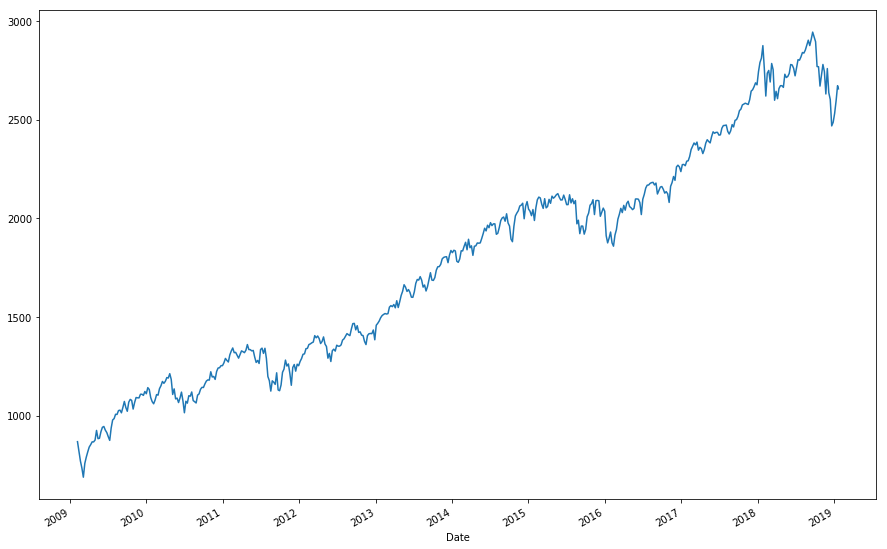

In [9]:
y.plot(figsize=(15,10))

In [10]:
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [11]:
predictions = gbm.predict(X_test)

In [12]:
predictions

array([2764.7615, 2647.4114, 2612.4163, 2678.3127, 2507.5383, 2503.4387,
       2393.369 , 2398.7502, 2424.9617, 2520.4648, 2623.0164],
      dtype=float32)

In [13]:
np.sqrt(mean_squared_error(y_test,predictions))

101.33897436305836

In [14]:
pred=pd.Series(predictions, index=y_test.index)

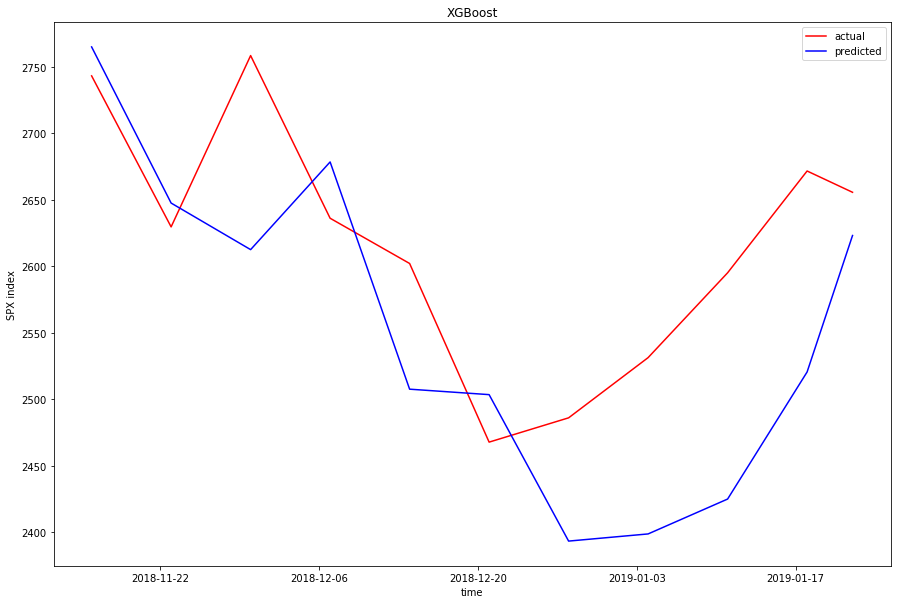

In [15]:
fig=plt.figure(figsize=(15,10))
plt.title('XGBoost')
plt.plot(y_test,'r',label='actual')
plt.legend('actual')
plt.plot(pred,'b',label='predicted')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('SPX index')
fig.savefig('XGBoost.pdf')
# может спрогнозировать остальные данные и подставить оценки в нашу модель???

                                    Now try hyperparameters tuning

In [38]:
groups = dt.groupby(dt.Date.dt.year).groups

In [40]:
sorted_groups = [value for (key, value) in sorted(groups.items())] 

In [73]:
cv=[(sorted_groups[2]+sorted_groups[3], sorted_groups[4]),
   (sorted_groups[3]+sorted_groups[4], sorted_groups[5])]

In [77]:
len(sorted_groups[9])

52

In [44]:
for i in range(len(sorted_groups)-2):
    print(i)

0
1
2
3
4
5
6
7
8


In [52]:
type(sorted_groups[10])

pandas.core.indexes.numeric.Int64Index

In [67]:
(sorted_groups[i] + sorted_groups[i+1]+sorted_groups[i+2], sorted_groups[i+3])
      for i in range(len(sorted_groups)-4)

IndentationError: unexpected indent (<ipython-input-67-e5713a7c7331>, line 2)

In [68]:
for i in range(len(sorted_groups)-4):
    print((sorted_groups[i] + sorted_groups[i+1]+sorted_groups[i+2], sorted_groups[i+3]))

ValueError: cannot evaluate a numeric op with unequal lengths

In [53]:
cv = [(sorted_groups[i] + sorted_groups[i+1]+sorted_groups[i+2], sorted_groups[i+3])
      for i in range(len(sorted_groups)-3)]

ValueError: cannot evaluate a numeric op with unequal lengths

In [ ]:
groups = dt.groupby(dt.date.dt.year).groups
# {2012: [0, 1], 2013: [2], 2014: [3], 2015: [4, 5]}
sorted_groups = [value for (key, value) in sorted(groups.items())] 
# [[0, 1], [2], [3], [4, 5]]

cv = [(sorted_groups[i] + sorted_groups[i+1], sorted_groups[i+2])
      for i in range(len(sorted_groups)-2)]

In [27]:
params={
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators': range(500,1000,100)
}

param_comb=10

In [29]:
xgb = xgb.XGBRegressor()

In [ ]:
# gbm1 = xgb.XGBRegressor(max_depth=3, n_estimators=500, learning_rate=0.05).fit(X_train, y_train,
#      eval_set=[(X_train,y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

In [30]:
random_search=RandomizedSearchCV(xgb, param_distributions=params,n_iter=param_comb, scoring='neg_mean_squared_error')

In [ ]:
random_search

In [17]:
predictions1 = gbm1.predict(X_test)

In [18]:
predictions

array([2764.7615, 2647.4114, 2612.4163, 2678.3127, 2507.5383, 2503.4387,
       2393.369 , 2398.7502, 2424.9617, 2520.4648, 2623.0164],
      dtype=float32)

In [19]:
predictions1

array([2764.3865, 2647.0364, 2612.541 , 2678.4375, 2507.663 , 2503.5635,
       2393.6277, 2399.009 , 2425.0864, 2520.5896, 2623.141 ],
      dtype=float32)

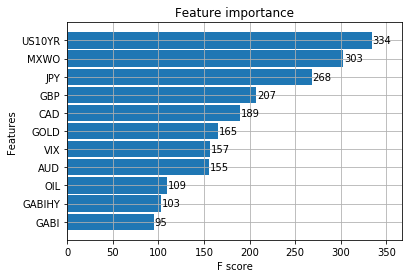

In [20]:
_ = plot_importance(gbm1, height=0.9)

In [23]:
pred1=pd.Series(predictions1, index=y_test.index)

Text(0,0.5,'SPX index')

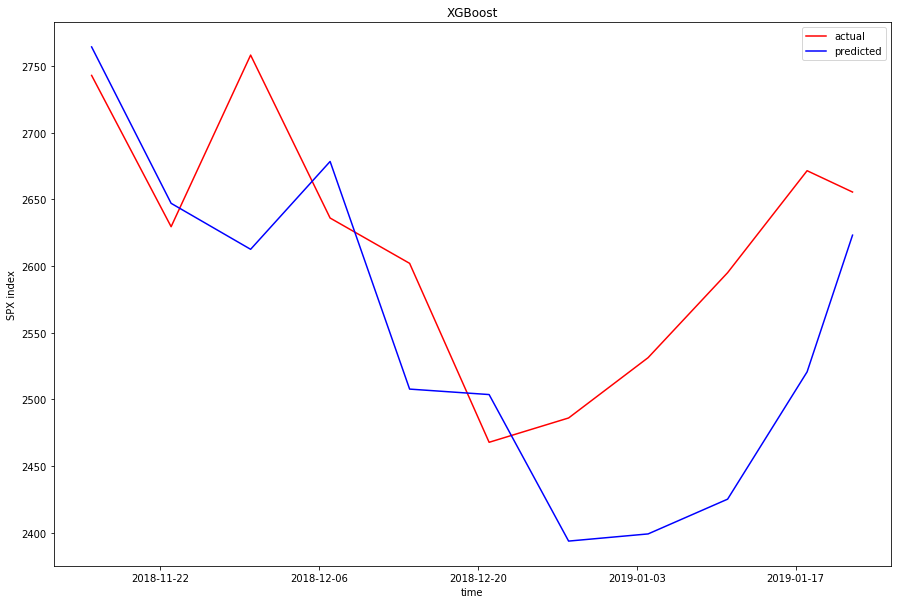

In [24]:
plt.figure(figsize=(15,10))
plt.title('XGBoost')
plt.plot(y_test,'r',label='actual')
plt.legend('actual')
plt.plot(pred1,'b',label='predicted')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('SPX index')

In [33]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)

In [34]:
param_grid

{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

In [32]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
 'learning_rate':range(0.05,0.3,0.2)  
}

SyntaxError: invalid syntax (<ipython-input-32-c07febbd7652>, line 4)

In [27]:
gsearch1 = RandomizedSearchCV(estimator = gbm1, 
 param_distributions = param_test1, scoring='neg_mean_squared_error',n_jobs=2)


In [29]:
gsearch1.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [30]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/ayan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -174917.51413, std: 68233.55107, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: -168427.81569, std: 62686.24163, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: -193086.21832, std: 86315.46729, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: -181257.27994, std: 72883.25100, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: -178595.06093, std: 73561.98482, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: -181793.36394, std: 75318.53699, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: -174781.39014, std: 67409.13893, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: -186160.36612, std: 79371.72934, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: -188451.29768, std: 82205.06417, params: {'min_child_weight': 5, 'max_depth': 9},
  mean: -168828.72413, std: 63163.65736, params: {'min_child_weight': 1, 'max_depth': 9}],
 {'min_child_weight': 1, 'max_depth': 7},
 -168427.81569456164)

In [111]:
from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(gbm, 'gmm_regressor.pkl') 


['gmm_regressor.pkl']

In [112]:
!ls

gmm_regressor.pkl  raw_data_shifted_data.xlsx  SARIMA.ipynb
raw_data.csv	   raw_data.xlsx	       XGBOOST.ipynb


In [113]:
# and later you can load it
clf = joblib.load('gmm_regressor.pkl')

In [114]:
clf.predict(X_test)

array([2764.7615, 2647.4114, 2612.4163, 2678.3127, 2507.5383, 2503.4387,
       2393.369 , 2398.7502, 2424.9617, 2520.4648, 2623.0164],
      dtype=float32)